<a href="https://colab.research.google.com/github/marcosalinas777/hospitaldata/blob/main/Interactive_map_for_public_health_facilities_geolocation_data_analysis_for_healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [9]:
df_geo=pd.read_csv('/content/drive/MyDrive/linkedin learning/Demo Health Facilities Geo Data_NHC.csv')
df_geo

Facility Type   Latitude  Longitude
0        Hospital   5.593051   3.697007
1        Hospital  10.017569   9.921846
2        Hospital   7.568808  11.178651
3        Hospital  11.574567  12.594135
4        Hospital   6.093634   9.334975
..            ...        ...        ...
762      Pharmacy  11.844224   9.831699
763      Pharmacy   8.228317   8.502529
764      Pharmacy   8.162100   4.821424
765      Pharmacy   7.568452   8.388384
766      Pharmacy   4.330299  10.229440

[767 rows x 3 columns]

In [10]:
df_geo['Facility Type'].value_counts()

Facility Type
Pharmacy                         627
Primary Care Center              118
Specialized Healthcare Center     12
Hospital                          10
Name: count, dtype: int64

<Axes: xlabel='Facility Type'>

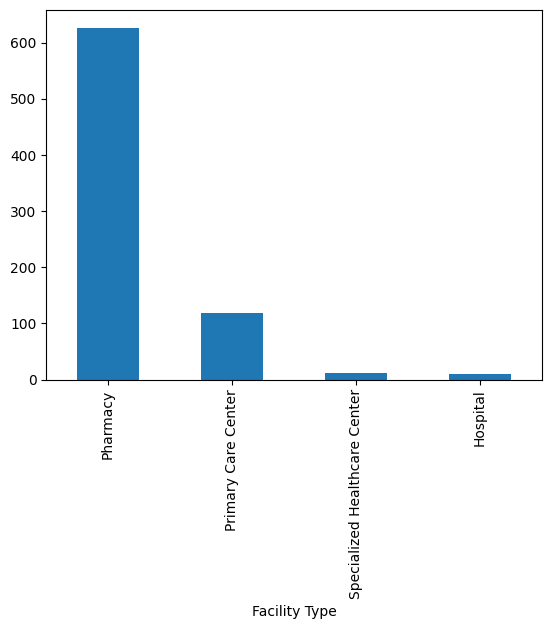

In [11]:
df_geo['Facility Type'].value_counts().plot(kind='bar')

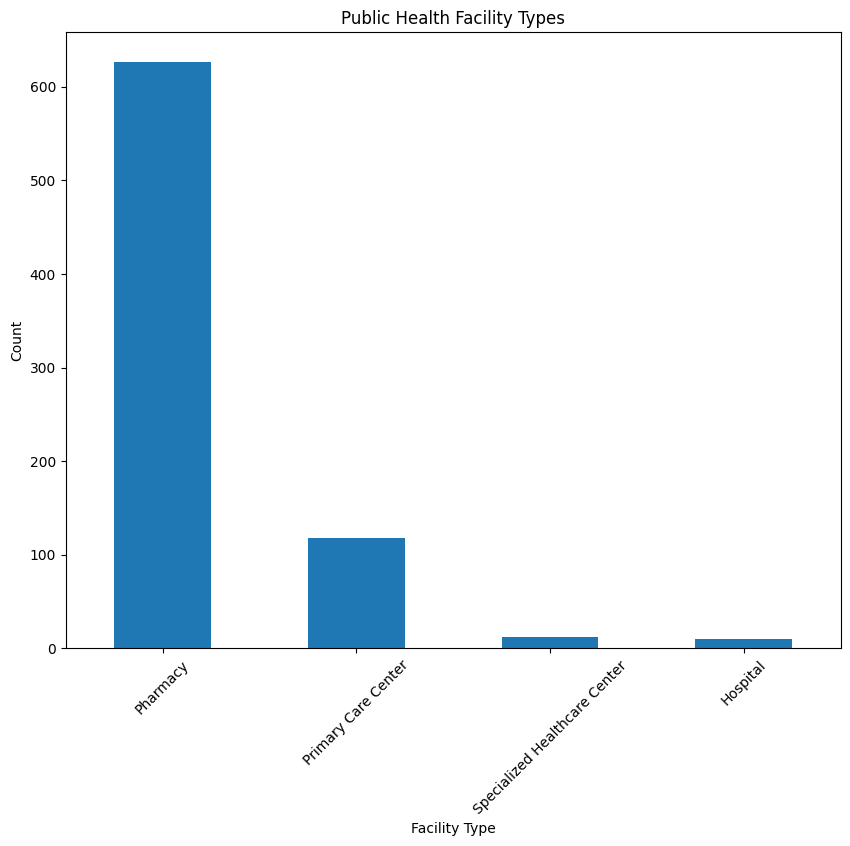

In [14]:
plt.figure(figsize=(10,8))
df_geo['Facility Type'].value_counts().plot(kind='bar')
plt.xlabel('Facility Type')
plt.ylabel('Count')
plt.xticks(rotation=45) #repositions the angle of the label
plt.title("Public Health Facility Types")
plt.show()

In [16]:
gdf=gpd.GeoDataFrame(df_geo,geometry=gpd.points_from_xy(df_geo.Longitude,df_geo.Latitude))
gdf
#this gives us an extra column in the gdf data frame which has the geometry of both longitude and latitude

Facility Type   Latitude  Longitude                   geometry
0        Hospital   5.593051   3.697007    POINT (3.69701 5.59305)
1        Hospital  10.017569   9.921846   POINT (9.92185 10.01757)
2        Hospital   7.568808  11.178651   POINT (11.17865 7.56881)
3        Hospital  11.574567  12.594135  POINT (12.59413 11.57457)
4        Hospital   6.093634   9.334975    POINT (9.33497 6.09363)
..            ...        ...        ...                        ...
762      Pharmacy  11.844224   9.831699   POINT (9.83170 11.84422)
763      Pharmacy   8.228317   8.502529    POINT (8.50253 8.22832)
764      Pharmacy   8.162100   4.821424    POINT (4.82142 8.16210)
765      Pharmacy   7.568452   8.388384    POINT (8.38838 7.56845)
766      Pharmacy   4.330299  10.229440   POINT (10.22944 4.33030)

[767 rows x 4 columns]

<Axes: >

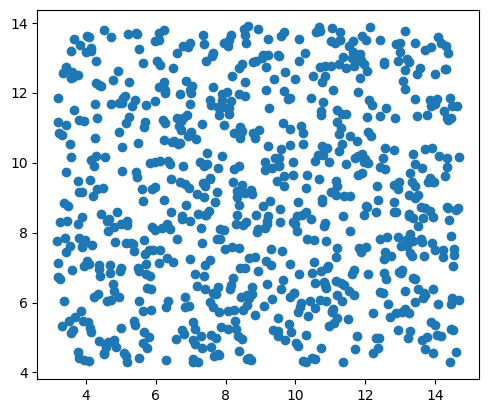

In [17]:
gdf.plot()

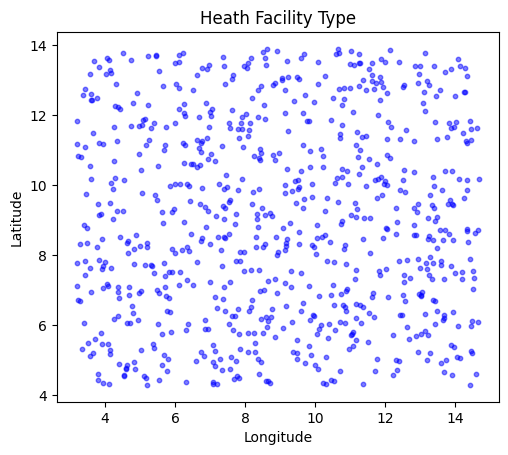

In [18]:
gdf.plot(markersize=10, color='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heath Facility Type')
plt.show()
#improves the visualization than the one above, a point map a scatter plot of locations

In [ ]:
#Buffers let you create bubbles around points
#we create a variable named copy from the gdf dataframe

In [19]:
buffers = gdf.copy()
buffers['geometry']=gdf.buffer(0.10)

<Axes: >

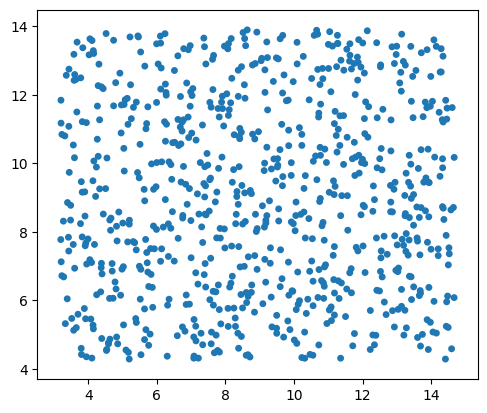

In [20]:
buffers.plot()

<Axes: >

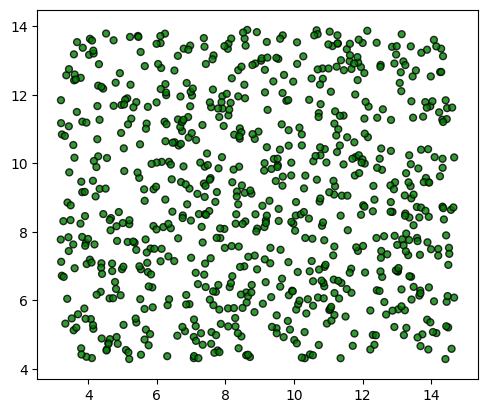

In [21]:
buffers.plot(color='green',edgecolor='k', alpha=0.8)

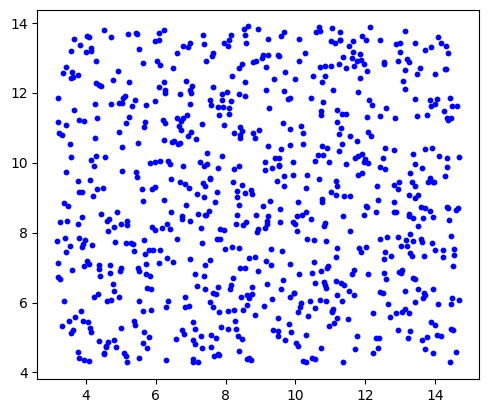

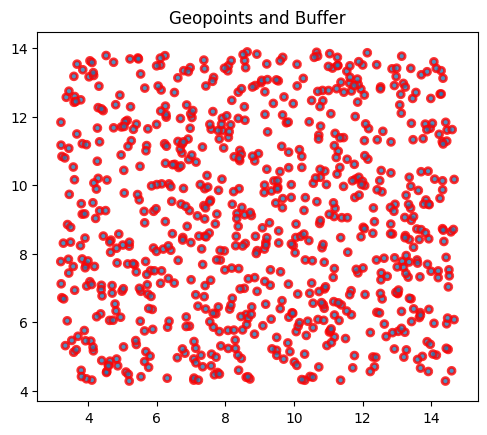

In [22]:
gdf.plot(color='blue',markersize=10, label='Geopoints')
buffers.plot(edgecolor='red', linewidth=2, label='Buffers', alpha=0.8)
plt.title("Geopoints and Buffer")
plt.show()

<ipython-input-23-b3a4cc5094ca>:4: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


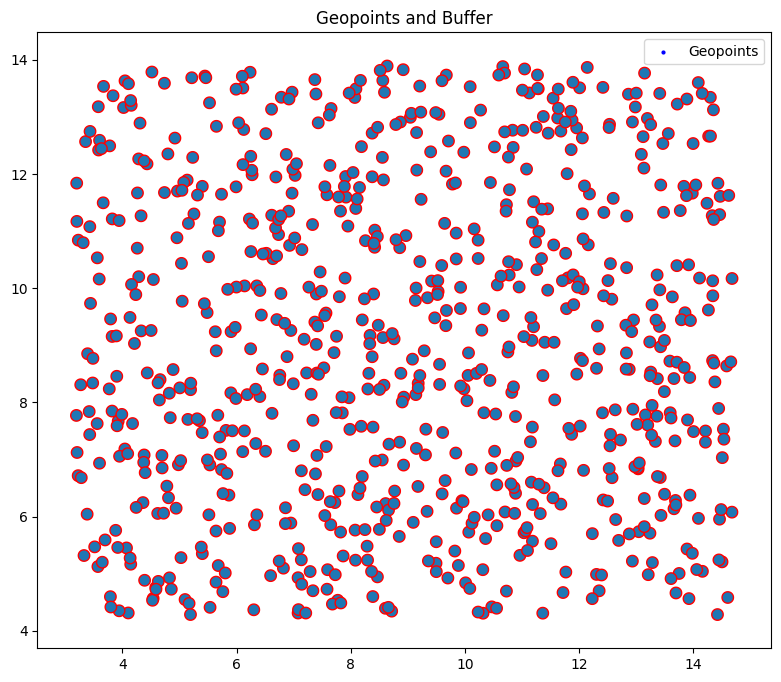

In [23]:
fig, ax=plt.subplots(figsize=(10,8))
gdf.plot(ax=ax,color='blue', markersize=4, label='Geopoints')
buffers.plot(ax=ax, edgecolor='red', linewidth=1, label='BUffers')
plt.legend()
plt.title('Geopoints and Buffer')
plt.show()

In [ ]:
#the blue dots are the real zone and the red circle are the buffer zone


In [ ]:
#how to make interactive maps

In [24]:
import pandas as pd
import folium

In [25]:
df_geo=pd.read_csv('/content/drive/MyDrive/linkedin learning/Demo Health Facilities Geo Data_NHC.csv')
df_geo

Facility Type   Latitude  Longitude
0        Hospital   5.593051   3.697007
1        Hospital  10.017569   9.921846
2        Hospital   7.568808  11.178651
3        Hospital  11.574567  12.594135
4        Hospital   6.093634   9.334975
..            ...        ...        ...
762      Pharmacy  11.844224   9.831699
763      Pharmacy   8.228317   8.502529
764      Pharmacy   8.162100   4.821424
765      Pharmacy   7.568452   8.388384
766      Pharmacy   4.330299  10.229440

[767 rows x 3 columns]

In [26]:
df_geo['Facility Type'].nunique()

4

In [27]:
df_geo['Facility Type'].unique() #to get the unique values

array(['Hospital', 'Primary Care Center', 'Specialized Healthcare Center',
       'Pharmacy'], dtype=object)

In [28]:
m=folium.Map(location=[df_geo['Latitude'].iloc[0],df_geo['Longitude'][0]])
for index,row in df_geo.iterrows():
  folium.Marker([row['Latitude'],row['Longitude']],popup=row['Facility Type']).add_to(m)
m

In [ ]:
#the above show the pharmacies, primary care centers, we added the rows in the df to the mpa

In [ ]:
#lets create a facility column

In [29]:
facility_color_mapping = {'Hospital':'red', 'Primary Care Center':'blue','Specialized Healthcare Center':'green','Pharmacy':'purple'}

In [30]:
m = folium.Map(location=[df_geo['Latitude'].iloc[0], df_geo['Longitude'][0]])
for index, row in df_geo.iterrows():
    facility_type = row['Facility Type']
    if facility_type in facility_color_mapping:
        color = facility_color_mapping[facility_type]
    else:
        color = 'gray'
    folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Facility Type'], icon=folium.Icon(color=color)).add_to(m)


In [ ]:
m

In [ ]:
 #we have created our map creating our own datapoints and using colors to signal different data facilities types

In [31]:
m = folium.Map(location=[df_geo['Latitude'].iloc[0],df_geo['Longitude'].iloc[0]])
facility_types_to_visualize= ['Hospital','Pharmacy']
filtered_df=df_geo[df_geo['Facility Type'].isin(facility_types_to_visualize)]

for index, row in filtered_df.iterrows():
  facility_type=row['Facility Type']
  color=facility_color_mapping.get(facility_type,'gray')
  folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Facility Type'],icon=folium.Icon(color=color)).add_to(m)

In [32]:
m

In [ ]:
#map has only pharmacies and hospitals, we can ADJUST THIS AND SAY WE want only hospitals in the map

In [34]:
m = folium.Map(location=[df_geo['Latitude'].iloc[0],df_geo['Longitude'].iloc[0]])
facility_types_to_visualize= ['Hospital']
filtered_df=df_geo[df_geo['Facility Type'].isin(facility_types_to_visualize)]

for index, row in filtered_df.iterrows():
  facility_type=row['Facility Type']
  color=facility_color_mapping.get(facility_type,'gray')
  folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Facility Type'],icon=folium.Icon(color=color)).add_to(m)

In [35]:
m

In [ ]:
#now we only see hospitals, we can see the different types by themselves or on combination

In [36]:
from folium.plugins import HeatMap

In [38]:
m= folium.Map(location=[df_geo['Latitude'].iloc[0],df_geo['Longitude'].iloc[0]])

In [39]:
heat_data=[[row['Latitude'],row['Longitude']] for index, row in df_geo.iterrows()]
HeatMap(heat_data).add_to(m)

In [40]:
m

In [ ]:
#we have a heat map, to interpret the heat map, areas with higher density appear in warmer colors like red

In [42]:
m.save('facility_heatmap.html')
#to save it as a zip file


In [44]:
from folium.plugins import MarkerCluster


In [43]:
m= folium.Map(location=[df_geo['Latitude'].iloc[0],df_geo['Longitude'].iloc[0]])

In [45]:
marker_cluster=MarkerCluster()

In [46]:
for index, row in df_geo.iterrows():
  marker = folium.Marker([row['Latitude'],row['Longitude']],popup=row['Facility Type'])
  marker.add_to(marker_cluster)

marker_cluster.add_to(m)


In [47]:
m

In [ ]:
#now we added clusters to the map, you can see them above, you can click on the cluster to see whats inside of them